# 오차 역전파
- 경사 하강법 : 임의의 가중치를 선언하고 결괏값을 이용해 오차를 구한 후 이 오차가 최소인 지점으로 계속해서 조금씩 이동시키는 것
- 이 오차가 최소인 지점 : 미분했을때 기울기가 0인 지점
- 경사하강법은 '단일 퍼셉트론', 즉 입력층과 출력층만 존재할 때 가능함
- 은닉층이 생기면 두 번의 경사 하강법을 실행해야 함

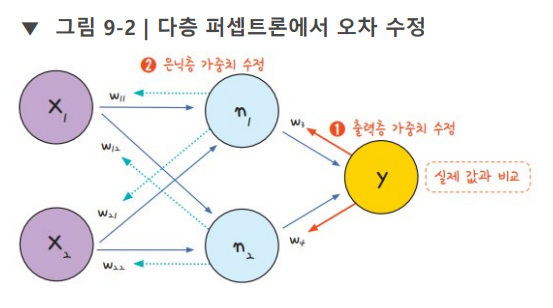

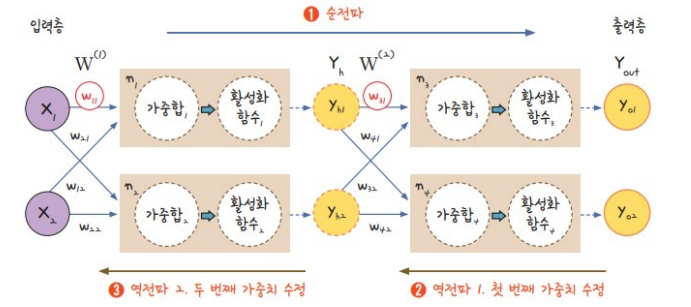

- 먼저 한 번의 순전파가 일어남
- 이 과정을 통해 가중치의 초깃값이 정해짐
- 이 초깃값의 가중치로 만들어진 값과 실제 값을 비교해 출력층의 오차 계산
- 이때 계산된 출력층의 오차를 최소화시키는 것이 목표
- 이를 위해 첫 번째 가중치를 수정하는 과정과 두 번째 가중치를 수정하는 과정이 이어짐

- w31을 업데이트 하기 위해서 오차 공식을 구하고 편미분을 함
- w11을 업데이트 하기 위해서 마찬가지로 오차 공식을 구하고 편미분 하면 되지만, 앞서 오차는 출력층의 결과와 실제 값을 비교해 오차를 얻었지만, 은닉층은 겉으로 드러나지 않으므로 그 값을 알수 없음. 즉, 오차를 구할만한 적절한 출력값이 없음을 의미함
- 해당 문제는 다시 출력층의 오차를 이용하는 것으로 해결
- w31의 경우 yo1의 오차만 필요했지만 w11은 yo1과 yo2 모두 관여되어 있으므로 오차 두 개를 모두 계산해 이를 편미분
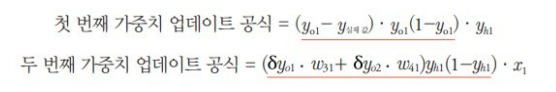

- 두 식 모두 out(1-out) 형식을 취하고 있고, 이를 델타식이라 함
- 은닉층의 숫자가 늘어도 이러한 형태가 반복되므로 이를 이용해 깊은 층 계산도 가능해 지면서 딥러닝이 시작됨
- 이제 수 많은 층을 연결해 학습하면 인공지능이 완성될 듯 보이지만 문제가 남아있음

# 활성화 함수와 고급 경사 하강법

### 문제점
- 깊은 층을 만들어 보니 출력층에서 시작된 가중치 업데이트가 처음 층까지 전달되지 않는 현상이 생김
- 이는 활성화 함수로 사용된 시그모이드 함수의 특성때문
- 시그모이드 함수를 미분하면 최대값은 0.25, 계속 곱하다 보면 0에 가까워지기 때문에 여러 층을 거칠수록 기울기가 사라져 가중치를 수정하기 어려워짐
- 이를 해결하고자 ReLU 를 제안

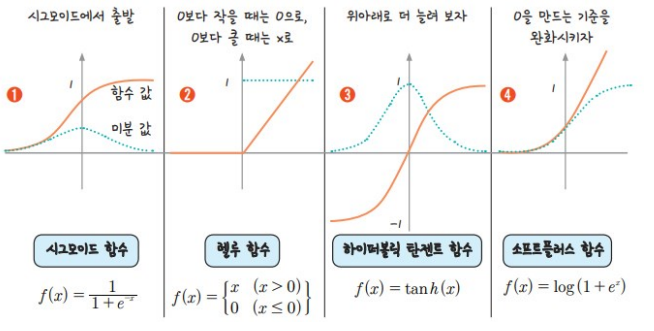

- 파란색 점선이 미분한 결과인데, x가 0보다 크기만 하면 미분값이 1임
- 활성화 함수로 ReLU를 사용하면 여러 번 오차 역전파가 진행되어도 맨 처음층까지 값이 남아있음
- 출력층에서 알아낸 오차가 역전파를 통해 입력층까지 거슬러 올라가면서 잘못된 가중치들 수정이 가능하게 되자 깊은층 쌓아 올리는 것이 가능해짐

## 고급 경사 하강법
- 정확하게 가중치를 찾아가지만 계산량이 많다는 단점을 가진 경사 하강법의 단점을 보완함
### 확률적 경사 하강법
- 경사 하강법은 한번 업데이트 할 때마다 전체 데이터를 미분하므로 속도도 느릴 뿐 아니라, 최적 해를 찾기 전에 최적화 과정이 멈출 수 있는 단점을 보완함
- 전체 데이터를 사용하는 것이 아닌 랜덤하게 추출한 일부 데이터만 사용하기 때문에 빠르고 더 자주 업데이트 가능함
- 중간 결과의 진폭이 크고 불안정해 보일 수 있지만, 속도가 빠르고 최적해에 근사한 값을 찾아낸다는 장점 덕분에 경사 하강법의 대안으로 사용됨
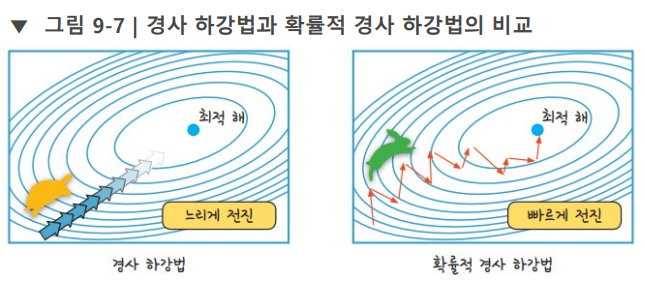
### 모멘텀(momentum)
- 관성, 탄력, 가속도
- 모멘텀 확률적 경사 하강법(모멘텀 SGD) : 경사 하강법에 탄력을 더해주는 것
- 경사 하강법과 마찬가지로 매번 기울기를 구하지만, 오차를 수정하기 전 바로 앞 수정 값과 방향(+,-)를 참고해 같은 방향으로 일정한 비율만 수정되게 하는 방법
- 수정 방향은 양으로 한번 음으로 한번 지그재그로 일어나는 현상이 줄고, 이전 이동 값을 고려해 일정 비율만큼 다음 값을 결정하므로 관성 효과가 남
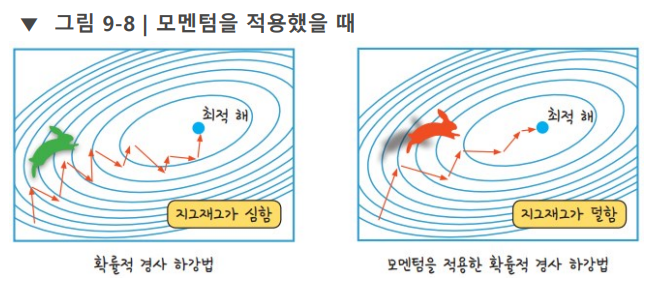
- 요즘은 정확도와 속도를 모두 향상시킨 아담(adam)이라는 고급 경사 하강법을 사용

### 옵티마이저(optimizer)
- 오차를 최소화하는 경사 하강법들
- optimizers라는 객체에 이름을 적어주면 실행 가능